In [94]:
import pandas as pd
import nltk
# nltk.download('stopwords')
from nltk.corpus import *
from nltk.stem import PorterStemmer
ps=PorterStemmer()

# Q1(A) Loading dataset into Panda Dataframe

In [96]:
path='C:/Users/Mitesh/Desktop/College/EVEN SEM/Convo/IMDB_Dataset.csv'
df = pd.read_csv(path)

# Q1(B) First 100 reviews into Corpus

In [ ]:

#Loads corpus as lsit of strings in content list
corpus = []
for line in df.iloc[:100,0]:
    corpus.append(line)

# Q2 Pre Processing Corpus With Port Stemmer

In [97]:
def load_preprocess_corpus():
    #Normalize, Tokenize, and Stop-word removal    
    stopword=nltk.corpus.stopwords.words('english')
    normalize_tokenize_nostop=[]
    for i in corpus:
        normalize_tokenize_nostop.append([word.lower() for word in i.split() if word.isalpha() and word not in stopword])
    #Stemming of words
    final=[]
    ps=PorterStemmer()
    for i in normalize_tokenize_nostop:
        final.append(' '.join([ps.stem(word) for word in i]))
    return final

content=load_preprocess_corpus()

# Q3(A) Binary
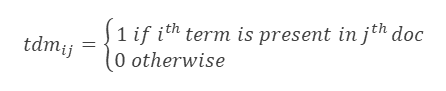

In [98]:
#Binary TDM from Scratch
doc_count={} 
for i in range(len(content)):
    word_count={} 
    for word in content[i].split():
        if word not in word_count.keys():
            word_count[word]=1
    doc_count[i]=word_count

#Converting dictionary to a TDM dataframe
binary_tdm_scratch=pd.DataFrame(doc_count)
binary_tdm_scratch.fillna(0,inplace=True)
binary_tdm_scratch

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
one,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
review,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mention,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
watch,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
oz,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
object,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
gripe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
upsid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
restart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [99]:
#Binary TDM using In-built function called CountVectorizer() class of sklearn.feature_extraction.text class
#For binary TDM set binary=True
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(binary=True)
cvfit=cv.fit_transform(content)

#Converting X to TDM DataFrame
binary_tdm_inbuilt=pd.DataFrame(cvfit.toarray().T,index=cv.get_feature_names_out())
binary_tdm_inbuilt

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
abbot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbrevi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
abet,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
abid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zellweg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
zombi,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Q3(B) Actual Term Frequency
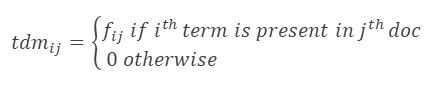

In [100]:
# Term frequency TDM from scratch
doc_count_ATF={}
for i in range(len(content)):
    word_count_ATF={}
    for word in content[i].split():
        if word not in word_count_ATF.keys():
            word_count_ATF[word]=0
        word_count_ATF[word]+=1
    doc_count_ATF[i]=word_count_ATF

#Converting dictionary to term frequency TDM dataframe
tdm_tf_scratch=pd.DataFrame(doc_count_ATF)
tdm_tf_scratch.fillna(0,inplace=True)
tdm_tf_scratch

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
one,1.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0
review,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mention,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
watch,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0
oz,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
object,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
gripe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
upsid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
restart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [101]:
# Term frequency TDM using CountVectorizer of Sklearn library
from sklearn.feature_extraction.text import CountVectorizer
cv_atf=CountVectorizer()
cv_fit_atf=cv_atf.fit_transform(content)

# Converting csr format to dataframe
tdm_tf_inbuilt=pd.DataFrame(cv_fit_atf.toarray().T,index=cv_atf.get_feature_names_out())
tdm_tf_inbuilt

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
abbot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbrevi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
abet,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
abid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zellweg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
zombi,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Q3(C) Term Frequency with length Normalization
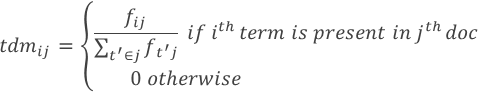

In [102]:
#Term Frequency with length Normalization TDM from scratch
tdm_length_norm_scratch=tdm_tf_scratch.iloc[:,:].div(tdm_tf_scratch.sum(axis=0),axis=1)
tdm_length_norm_scratch

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
one,0.007576,0.014925,0.014493,0.000000,0.061856,0.026316,0.0,0.014085,0.038462,0.0,...,0.0,0.014493,0.0,0.012195,0.000000,0.000000,0.024691,0.000000,0.012658,0.000000
review,0.007576,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mention,0.007576,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
watch,0.022727,0.014925,0.014493,0.018519,0.000000,0.000000,0.0,0.000000,0.019231,0.0,...,0.0,0.014493,0.0,0.000000,0.022222,0.009615,0.000000,0.016393,0.037975,0.000000
oz,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
object,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004202
gripe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004202
upsid,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004202
restart,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004202


In [103]:
#Term Frequency with length Normalization TDM using TfIdfVectorizer class of sklearn
# for only tf set use_idf=False and length normalization set norm='l1'
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(use_idf=False,norm='l1')
tflenfit=tf.fit_transform(content)

tdm_len_norm_inbuilt=pd.DataFrame(tflenfit.toarray().T,index=tf.get_feature_names_out())
tdm_len_norm_inbuilt

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
abbot,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
abbrevi,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.012658,0.0,0.0,0.0
abet,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.006623,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
abid,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
abil,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zellweg,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
zeu,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.012658,0.0,0.0,0.0
zombi,0.0,0.0,0.0,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
zone,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# Q3(D) Term Frequency-Inverse Document Frequency TDM
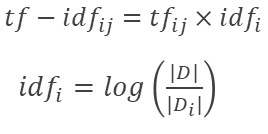

In [104]:
#Computing idf from scratch
import numpy as np
no_of_docs=100
unique_terms=tdm_length_norm_scratch.index #as idf is computed for each unique term of corpus
idf_count={} #to store idf score of each term of corpus
for term in unique_terms:
    idf_count[term]=0 #initializing entry in idf dictionary
    for doc in content:
        if term in doc.split():
            idf_count[term]+=1
    idf_count[term]=np.log10(no_of_docs/idf_count[term])

#Converting idf_count dictionary to DataFrame
idf_series=pd.Series(idf_count)
idf=pd.DataFrame(idf_series)

#Computing tf-idf by multiplying tf and idf
tf_idf_scratch=tdm_length_norm_scratch*idf.values
tf_idf_scratch

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
one,0.002347,0.004624,0.004490,0.000000,0.019163,0.008153,0.0,0.004363,0.011916,0.0,...,0.0,0.004490,0.0,0.003778,0.000000,0.000000,0.007649,0.000000,0.003922,0.000000
review,0.012871,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mention,0.009256,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
watch,0.012218,0.008024,0.007791,0.009956,0.000000,0.000000,0.0,0.000000,0.010339,0.0,...,0.0,0.007791,0.0,0.000000,0.011947,0.005169,0.000000,0.008813,0.020415,0.000000
oz,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
object,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008403
gripe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008403
upsid,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008403
restart,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008403


In [105]:
#Term Frequency-Inverse Document Frequency TDM using TfIdfVectorizer class of sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
fitidf=tfidf.fit_transform(content)
tf_idf_inbuilt=pd.DataFrame(fitidf.toarray().T,index=tfidf.get_feature_names_out())
tf_idf_inbuilt

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
abbot,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
abbrevi,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.143738,0.0,0.0,0.0
abet,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.087464,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
abid,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
abil,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zellweg,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
zeu,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.143738,0.0,0.0,0.0
zombi,0.0,0.0,0.0,0.148958,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
zone,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# Q4(A) Term-Term Co-occurrence Matrix
Obtained from multiplying binary tdm and its transpose

In [106]:
# Co-occurrence matrix from binary TDM
co_occur_matrix=np.dot(binary_tdm_scratch.values,binary_tdm_scratch.values.T)
np.fill_diagonal(co_occur_matrix,0)
co_occur_matrix=pd.DataFrame(co_occur_matrix, index=binary_tdm_scratch.index,columns=binary_tdm_scratch.index)
co_occur_matrix

,one,review,mention,watch,oz,episod,they,exactli,happen,first,...,spin,primari,activ,pointer,enemi,object,gripe,upsid,restart,superb
one,0.0,2.0,2.0,16.0,1.0,2.0,3.0,5.0,4.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
review,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mention,2.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
watch,16.0,1.0,3.0,0.0,1.0,1.0,2.0,1.0,3.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oz,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
object,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
gripe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
upsid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
restart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


# Q4(B) Pointwise Mutual Information (PMI)

PPMI will give 0 as the answer in every case as we get values less than 1 for every term for which log will give a negative number. And then Max of log and 0 will give 0 always.
I have used 2 for loops for finding PMI for each pair because of which we get all values as 0

This code is taking 1 minute to run becuase i have used 2 For loops for the processing of each term
because of which around 100K valued dictionary is being made

In [109]:
unique_terms=tdm_length_norm_scratch.index
PMI_count={}
for term in unique_terms:
    PMI_count[term]=0 
    for doc in content:
        if term in doc.split():
            PMI_count[term]+=1 #No of documents the term is in
PMI={}
for term in unique_terms:
    PMI[term] = {}
    for term2 in unique_terms:
        PMI[term][term2]= np.log2((co_occur_matrix[term][term2])/(PMI_count[term]*PMI_count[term2]))

PMI_matrix=pd.DataFrame(PMI)
PMI_matrix

C:\Users\Mitesh\AppData\Local\Temp\ipykernel_8660\1155904098.py:12: RuntimeWarning: divide by zero encountered in log2
  PMI[term][term2]= np.log2((co_occur_matrix[term][term2])/(PMI_count[term]*PMI_count[term2]))


,one,review,mention,watch,oz,episod,they,exactli,happen,first,...,spin,primari,activ,pointer,enemi,object,gripe,upsid,restart,superb
one,-inf,-5.614710,-7.199672,-6.472691,-5.614710,-5.614710,-6.029747,-5.614710,-6.422065,-6.614710,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
review,-5.614710,-inf,-3.584963,-5.857981,-1.000000,-2.000000,-3.000000,-3.321928,-3.807355,-5.700440,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
mention,-7.199672,-3.584963,-inf,-5.857981,-2.584963,-3.584963,-4.584963,-4.906891,-4.392317,-5.700440,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
watch,-6.472691,-5.857981,-5.857981,-inf,-4.857981,-5.857981,-5.857981,-7.179909,-6.080373,-6.973458,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
oz,-5.614710,-1.000000,-2.584963,-4.857981,-inf,-1.000000,-2.000000,-2.321928,-2.807355,-4.700440,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
object,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-4.700440,...,0.0,0.0,0.0,0.0,0.0,-inf,0.0,0.0,0.0,0.0
gripe,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-4.700440,...,0.0,0.0,0.0,0.0,0.0,0.0,-inf,0.0,0.0,0.0
upsid,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-4.700440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,0.0,0.0
restart,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-4.700440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,0.0
